## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
display(data_0.corr())
display(data_0.describe())
print(data_0.duplicated().value_counts())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


False    100000
dtype: int64


In [6]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
display(data_1.corr())
display(data_1.describe())
print(data_1.duplicated().value_counts())

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


False    100000
dtype: int64


In [9]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
display(data_2.corr())
display(data_2.describe())
print(data_2.duplicated().value_counts())

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


False    100000
dtype: int64


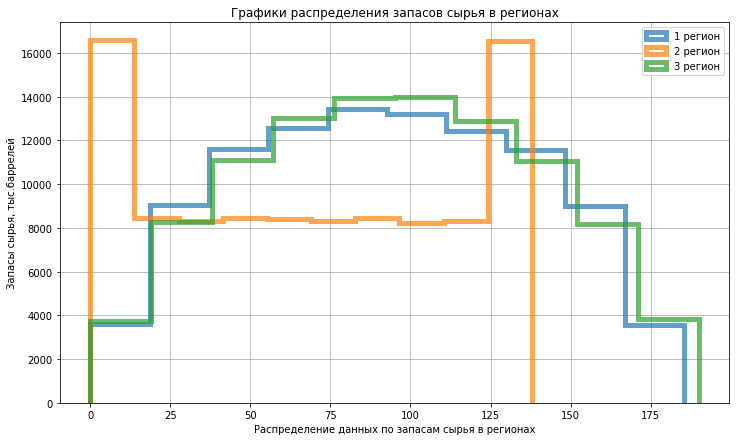

In [12]:
plt.title('Графики распределения запасов сырья в регионах')
ax=data_0['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7, histtype='step', linewidth=5, label='1 регион')
ax1=data_1['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='2 регион', ax=ax)
data_2['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='3 регион', ax=ax1)
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

Данные загружены и не требуют дополнительной предобработки, а так же мы теперь имеем визуальное представление о распределении данных по запасам сырья в регионах. На графике отчётливо показана разительно отличающаяся кривая распределения запасов сырья по скважинам 2 региона. Отметим так же, что на данных по корреляции значений второго регоина, мы видим сильную зависимость целевого показателя 'profit' от f0.

## Обучение и проверка модели

In [13]:
target_0 = data_0['product']
features_0 = data_0.drop(['product', 'id'], axis=1)

target_1 = data_1['product']
features_1 = data_1.drop(['product', 'id'], axis=1)

target_2 = data_2['product']
features_2 = data_2.drop(['product', 'id'], axis=1)

In [14]:
data_train_0, data_test_0 = train_test_split(data_0, test_size=0.2, random_state=12345)
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=12345)

data_train_1, data_test_1 = train_test_split(data_1, test_size=0.2, random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

data_train_2, data_test_2 = train_test_split(data_2, test_size=0.2, random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

In [15]:
def lr(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train,target_train)
    global predict
    predict = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predict)**0.5
    
    print('Среднеквадратичная ошибка RMSE: %.2f' % rmse)
    print('Коэффициент детерминации: %.2f' % r2_score(target_valid, predict))
    print('Средний запас предсказанного сырья', predict.mean())

In [16]:
lr(features_train_0, target_train_0, features_valid_0, target_valid_0)
predict_0 = predict

Среднеквадратичная ошибка RMSE: 37.58
Коэффициент детерминации: 0.28
Средний запас предсказанного сырья 92.59256778438035


In [17]:
lr(features_train_1, target_train_1, features_valid_1, target_valid_1)
predict_1 = predict

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00
Средний запас предсказанного сырья 68.728546895446


In [18]:
lr(features_train_2, target_train_2, features_valid_2, target_valid_2)
predict_2 = predict

Среднеквадратичная ошибка RMSE: 40.03
Коэффициент детерминации: 0.21
Средний запас предсказанного сырья 94.96504596800489


Сохраним предсказания и правильные ответы на валидационной выборке

In [19]:
print('1 регион:\n- предсказания модели: "predict_0"\n- правильные ответы: "target_valid_0"')
print()
print('2 регион:\n- предсказания модели: "predict_1"\n- правильные ответы: "target_valid_1"')
print()
print('3 регион:\n- предсказания модели: "predict_2"\n- правильные ответы: "target_valid_2"')

1 регион:
- предсказания модели: "predict_0"
- правильные ответы: "target_valid_0"

2 регион:
- предсказания модели: "predict_1"
- правильные ответы: "target_valid_1"

3 регион:
- предсказания модели: "predict_2"
- правильные ответы: "target_valid_2"


## Подготовка к расчёту прибыли

In [20]:
BUDGET = 10_000_000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 450 #Доход с каждой единицы продукта, тыс.руб
target_probability_losses = 2.5/100 # вероятность убытков
product_mean_0 = data_0['product'].mean()
product_mean_1 = data_1['product'].mean()
product_mean_2 = data_2['product'].mean()

print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


In [21]:
budg_per_1_point = (BUDGET/200)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_per_1_point/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [22]:
v_prod=budg_per_1_point/INCOME_ONE_PROD
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_prod,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе

In [23]:
data_0['profit'] = (data_0['product']*(INCOME_ONE_PROD)).round(2) # profit, тыс.руб
data_0['roi_%'] = ((data_0['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_0.head()

,id,f0,f1,f2,product,profit,roi_%
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


In [24]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_0/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_0))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: -16.75%
Или 18.61 тыс.баррелей


In [25]:
data_1['profit'] = (data_1['product']*(INCOME_ONE_PROD)).round(2) # profit, тыс.руб
data_1['roi_%'] = ((data_1['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_1.head()

,id,f0,f1,f2,product,profit,roi_%
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-97.14
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97,-75.74
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84,21.29
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43,24.15
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84,21.29


In [26]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_1/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_1))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: -38.06%
Или 42.29 тыс.баррелей


In [27]:
data_2['profit'] = (data_2['product']*(INCOME_ONE_PROD)).round(2) # profit, тыс.руб
data_2['roi_%'] = ((data_2['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_2.head()

,id,f0,f1,f2,product,profit,roi_%
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-75.02
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36,-49.54
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36,-43.42
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78,3.12
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34,34.64


In [28]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_2/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_2))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: -14.50%
Или 16.11 тыс.баррелей


Вывод
Исходя из полученных данных становится очевидно, что среднее количество запасов сырья по регионам недостаточное даже для окупаемости разработки, требуется выбрать скважины с максимальными запасами

Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [29]:
def profit_for_vp(predict, target, count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False) # Выполним привязку индексов скважин к предсказаниям модели и отсорируем список по убыванию
    selected_max = probs_sorted[:count].sum() # Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям
    profit_pred = (selected_max * INCOME_ONE_PROD) - BUDGET # Рассчитаем прибыль для полученного объёма сырья
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

In [30]:
profit_for_vp(predict_0, target_valid_0, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей
Прибыль для полученного объёма сырья составит 3996.05 млн.рублей


In [31]:
profit_for_vp(predict_1, target_valid_1, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 27746.03 тыс.баррелей
Прибыль для полученного объёма сырья составит 2485.71 млн.рублей


In [32]:
profit_for_vp(predict_2, target_valid_2, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 29603.90 тыс.баррелей
Прибыль для полученного объёма сырья составит 3321.75 млн.рублей


Вывод
Отлично, все три региона потенциально прибыльные, для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём расчёт вероятности.

## Расчёт прибыли и рисков 

In [33]:
def profit_for_vp2(predict, target, count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    return revenue - BUDGET

In [34]:
def bootstap_1000(target, predict):
    values = []
    count = 0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample, target_subsample, 200))  
    
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind = "hist", grid = True, figsize = (8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))

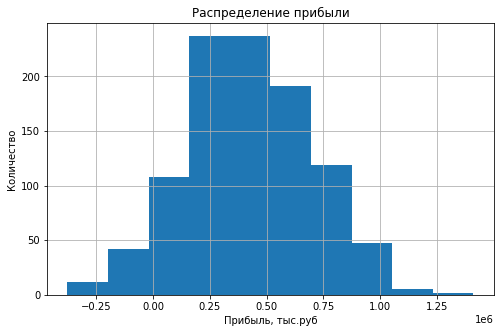

Средняя прибыль: 425.94 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -102.09 млн.руб до: 947.98 млн.руб
95%-ый доверительный интервал: от 408.73 млн.руб до 443.14 млн.руб
Процент вероятности убытка в данном регионе составит 6.0%


In [35]:
bootstap_1000(target_valid_0, predict_0)

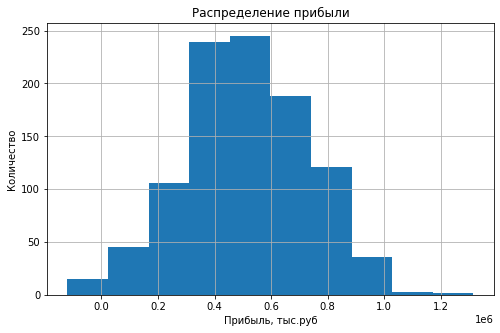

Средняя прибыль: 515.22 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 68.87 млн.руб до: 931.55 млн.руб
95%-ый доверительный интервал: от 501.62 млн.руб до 528.82 млн.руб
Процент вероятности убытка в данном регионе составит 1.0%


In [36]:
bootstap_1000(target_valid_1, predict_1)

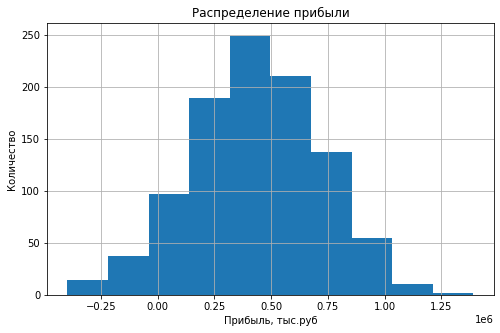

Средняя прибыль: 435.01 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -128.88 млн.руб до: 969.71 млн.руб
95%-ый доверительный интервал: от 417.45 млн.руб до 452.56 млн.руб
Процент вероятности убытка в данном регионе составит 6.4%


In [37]:
bootstap_1000(target_valid_2, predict_2)

In [38]:
comparison_tabl = pd.DataFrame(index = ['Средняя прибыль в регионе, млн.руб','Суммарный запас сырья, тыс.баррелей','Вероятность убытка, %'], columns=['1 регион','2 регион','3 регион'])
comparison_tabl['1 регион'] = '425.94', '31102.33','6'
comparison_tabl['2 регион'] = '515.22', '27746.03','1'
comparison_tabl['3 регион'] = '435.01', '3321.75','6.4'
comparison_tabl

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",425.94,515.22,435.01
"Суммарный запас сырья, тыс.баррелей",31102.33,27746.03,3321.75
"Вероятность убытка, %",6,1,6.4


Вывод
Согласно распределению среднего значения прибыли с региона, самым прибыльным оказался 2 регион, средняя прибыль в этом регионе составит 515.22 млн.рублей. Два других региона не прошли отбор по минимально допустимому порогу убытка в 2,5%. Таким образом не смотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во втором регионе прогнозируется выше других.